In [ ]:
import pandas as pd
df = pd.read_csv("atlas_2J2LMET30_processed.csv")
print(df.columns)
df.head()


Index(['m_ll', 'met', 'n_jets', 'n_bjets', 'ht', 'meff', 'dR_ll', 'j1_pt',
       'j2_pt'],
      dtype='object')


,m_ll,met,n_jets,n_bjets,ht,meff,dR_ll,j1_pt,j2_pt
0,98.786705,32.000393,3,3,129.124790,265.38810,2.447582,45.529007,44.244377
1,0.954021,41.463880,2,2,42.722340,121.04103,0.060582,20.359121,22.363218
2,2.428268,49.653850,3,3,268.306270,337.47818,0.248110,140.996840,87.729790
3,19.196783,39.204754,2,2,48.385006,104.70331,3.193857,26.345266,22.039740
4,3.124062,37.127810,2,2,67.595630,137.21333,0.217480,41.679920,25.915710


# DETECTION OF MALFUNCTIONS SUSY

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuración visual y semilla
sns.set(style="whitegrid")
torch.manual_seed(42)
np.random.seed(42)

print("setting ready")


setting ready


# Load dataset

In [3]:
df = pd.read_csv("atlas_2J2LMET30_processed.csv")

print("Data loaded:")
print(df.head())
print("\nColumnas:", df.columns.tolist())
print(f"Total Events: {len(df)}")

display(df.describe())

Data loaded:
        m_ll        met  n_jets  n_bjets          ht       meff     dR_ll  \
0  98.786705  32.000393       3        3  129.124790  265.38810  2.447582   
1   0.954021  41.463880       2        2   42.722340  121.04103  0.060582   
2   2.428268  49.653850       3        3  268.306270  337.47818  0.248110   
3  19.196783  39.204754       2        2   48.385006  104.70331  3.193857   
4   3.124062  37.127810       2        2   67.595630  137.21333  0.217480   

        j1_pt      j2_pt  
0   45.529007  44.244377  
1   20.359121  22.363218  
2  140.996840  87.729790  
3   26.345266  22.039740  
4   41.679920  25.915710  

Columnas: ['m_ll', 'met', 'n_jets', 'n_bjets', 'ht', 'meff', 'dR_ll', 'j1_pt', 'j2_pt']
Total Events: 5652084


,m_ll,met,n_jets,n_bjets,ht,meff,dR_ll,j1_pt,j2_pt
count,5.652084e+06,5.652084e+06,5.652084e+06,5.652084e+06,5.652084e+06,5.652084e+06,5.652084e+06,5.652084e+06,5.652084e+06
mean,5.389265e+01,5.248854e+01,2.550815e+00,2.550815e+00,1.130930e+02,2.365825e+02,1.671297e+00,6.158982e+01,3.554418e+01
std,5.074412e+01,2.605402e+01,8.777221e-01,8.777221e-01,8.849181e+01,1.262419e+02,1.219510e+00,5.053142e+01,2.592341e+01
min,-1.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,4.000844e+01,8.539335e+01,0.000000e+00,2.000001e+01,2.000000e+01
25%,4.358003e+00,3.610141e+01,2.000000e+00,2.000000e+00,5.667536e+01,1.545345e+02,3.362775e-01,2.948709e+01,2.248462e+01
50%,5.217056e+01,4.449343e+01,2.000000e+00,2.000000e+00,8.319263e+01,2.001274e+02,1.790803e+00,4.396196e+01,2.632846e+01
75%,9.061056e+01,5.920283e+01,3.000000e+00,3.000000e+00,1.345348e+02,2.788534e+02,2.786010e+00,7.556986e+01,3.635215e+01
max,2.845972e+03,9.215549e+02,1.400000e+01,1.400000e+01,2.646858e+03,3.248407e+03,5.860600e+00,1.853147e+03,1.189310e+03


# Scaling of data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

print("Data scaled and loaded in DataLoader")


Data scaled and loaded in DataLoader


# Exploratory visualisation

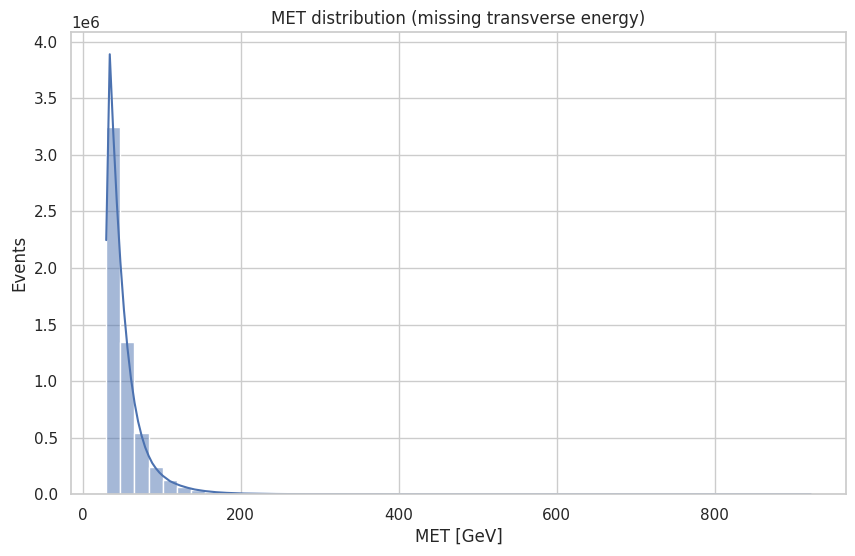

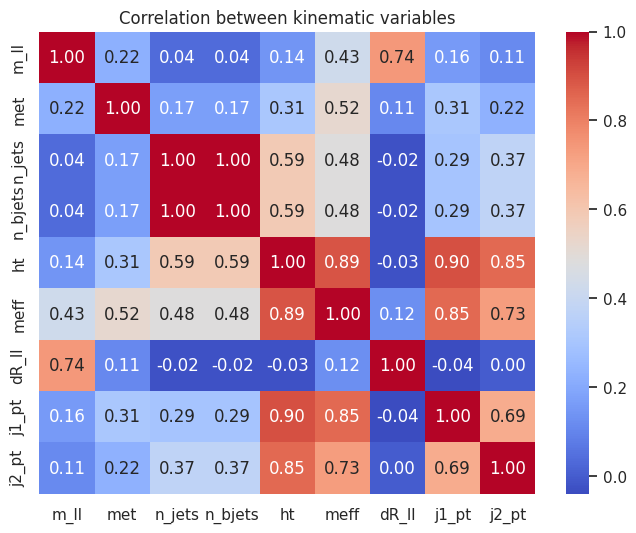

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df["met"], bins=50, kde=True)
plt.title("MET distribution (missing transverse energy)")
plt.xlabel("MET [GeV]")
plt.ylabel("Events")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation between kinematic variables")
plt.show()


# Dimensionality reduction with PCA (optional)

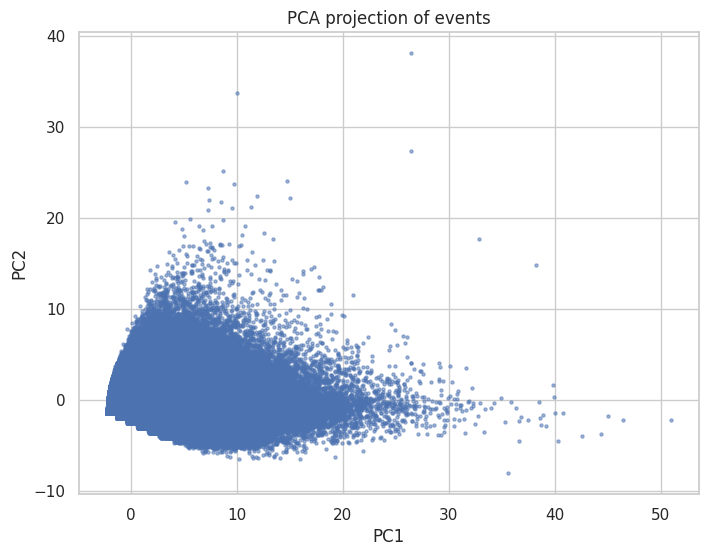

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, alpha=0.5)
plt.title("PCA projection of events")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Define Autoencoder in PyTorch

In [7]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4)
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder(input_dim=X_scaled.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=9, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=9, bias=True)
  )
)


# Training of the Autoencoder

Epoch [10/50] - Loss: 0.015719
Epoch [20/50] - Loss: 0.014704
Epoch [30/50] - Loss: 0.011891
Epoch [40/50] - Loss: 0.012641
Epoch [50/50] - Loss: 0.013610


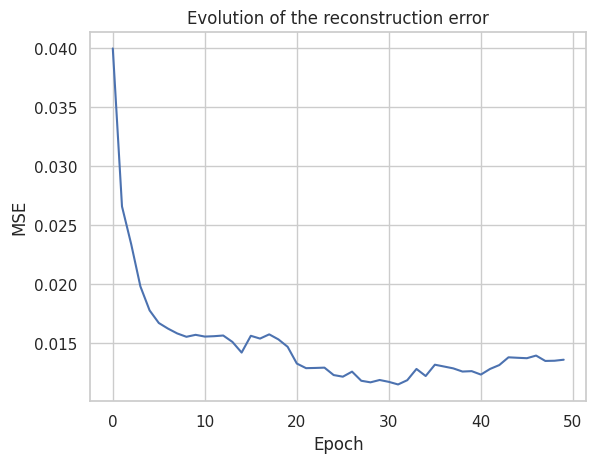

In [8]:
n_epochs = 50
losses = []

for epoch in range(n_epochs):
    epoch_loss = 0
    for batch in loader:
        x = batch[0]
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, x)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    losses.append(epoch_loss / len(loader))
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {losses[-1]:.6f}")

plt.plot(losses)
plt.title("Evolution of the reconstruction error")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()


# Calculate reconstruction error

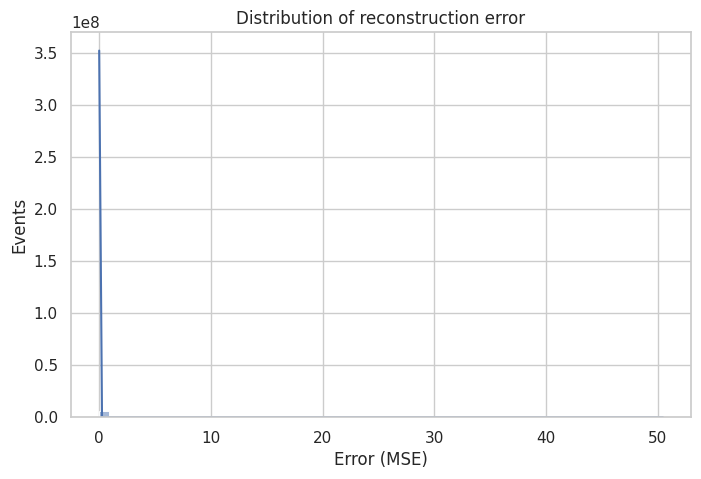

Example of errors:
count    5.652084e+06
mean     1.373977e-02
std      6.024008e-02
min      4.371163e-05
25%      1.111867e-03
50%      2.856925e-03
75%      9.032120e-03
max      5.043145e+01
Name: recon_error, dtype: float64


In [9]:
with torch.no_grad():
    reconstructed = model(X_tensor)
    errors = torch.mean((X_tensor - reconstructed)**2, dim=1).numpy()

df["recon_error"] = errors

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=60, kde=True)
plt.title("Distribution of reconstruction error")
plt.xlabel("Error (MSE)")
plt.ylabel("Events")
plt.show()

print("Example of errors:")
print(df["recon_error"].describe())


# Select anomalous events

Threshold of anomaly: 0.18359
suspicious events: 56521 / 5652084


/home/working/miniconda3/envs/SUSY_2L2J_MET/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


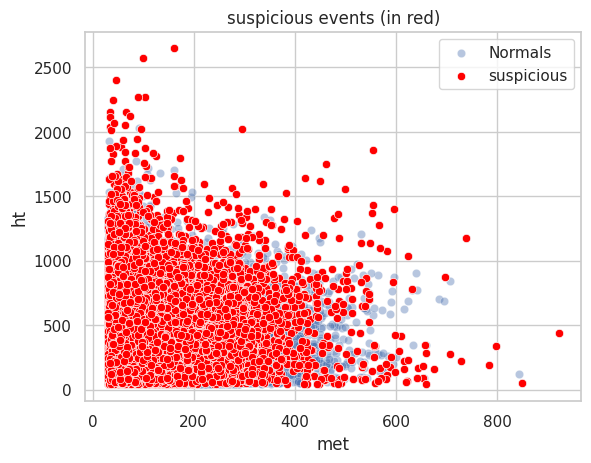

In [11]:
threshold = np.percentile(errors, 99)  # top 1%
anomalies = df[df["recon_error"] > threshold]

print(f"Threshold of anomaly: {threshold:.5f}")
print(f"suspicious events: {len(anomalies)} / {len(df)}")

sns.scatterplot(x="met", y="ht", data=df, label="Normals", alpha=0.4)
sns.scatterplot(x="met", y="ht", data=anomalies, color="red", label="suspicious")
plt.title("suspicious events (in red)")
plt.legend()
plt.show()


# Save candidates SUSY

In [12]:
anomalies.to_csv("susy_candidates.csv", index=False)
print("SUSY candidates saved in 'susy_candidates.csv' ")

SUSY candidates saved in 'susy_candidates.csv' 
